b'BM6\xec\x03\x00\x00\x00\x00\x006\x04\x00\x00(\x00\x00\x00\x80\x02\x00\x00\x90\x01\x00\x00\x01\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x01\x01\x00\x02\x02\x02\x00\x03\x03\x03\x00\x04\x04\x04\x00\x05\x05\x05\x00\x06\x06\x06\x00\x07\x07\x07\x00\x08\x08\x08\x00\t\t\t\x00\n\n\n\x00\x0b\x0b\x0b\x00\x0c\x0c\x0c\x00\r\r\r\x00\x0e\x0e\x0e\x00\x0f\x0f\x0f\x00\x10\x10\x10\x00\x11\x11\x11\x00\x12\x12\x12\x00\x13\x13\x13\x00\x14\x14\x14\x00\x15\x15\x15\x00\x16\x16\x16\x00\x17\x17\x17\x00\x18\x18\x18\x00\x19\x19\x19\x00\x1a\x1a\x1a\x00\x1b\x1b\x1b\x00\x1c\x1c\x1c\x00\x1d\x1d\x1d\x00\x1e\x1e\x1e\x00\x1f\x1f\x1f\x00   \x00!!!\x00"""\x00###\x00$$$\x00%%%\x00&&&\x00\'\'\'\x00(((\x00)))\x00***\x00+++\x00,,,\x00---\x00...\x00///\x00000\x00111\x00222\x00333\x00444\x00555\x00666\x00777\x00888\x00999\x00:::\x00;;;\x00<<<\x00===\x00>>>\x00???\x00@@@\x00AAA\x00BBB\x00CCC\x00DDD\x00EEE\x00FFF\x00GGG\x00HHH\x00III\x00JJJ\x0

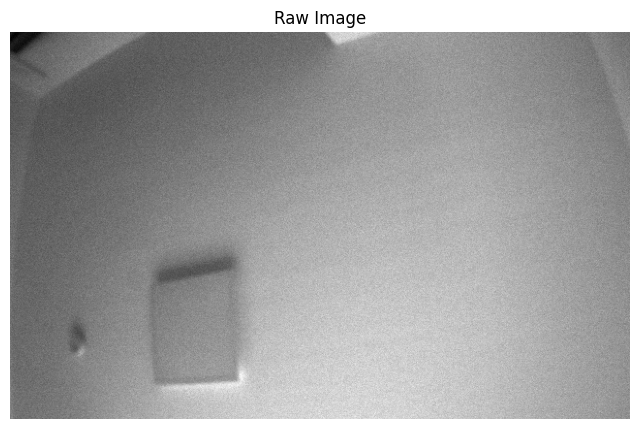

In [ ]:
import bmemcached
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Connect to Memcached
MEMCACHED_SERVER = "localhost:11211"  # Change this to your server
client = bmemcached.Client((MEMCACHED_SERVER))

timestamp = "1738938891440"  # Replace with actual timestamp key

# Retrieve the BMP image from Memcached
bmp_data = client.get(timestamp)
print(bmp_data)
if bmp_data:
    # Convert the binary data into a NumPy array
    np_arr = np.frombuffer(bmp_data, dtype=np.uint8)

    # Decode the image from BMP format
    raw_image = cv2.imdecode(np_arr, cv2.IMREAD_UNCHANGED)
    raw_image = raw_image.reshape(400, 640)

    # Plot the raw image using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(raw_image, cmap='gray')  # Display normalized image with 'gray' colormap
    plt.axis('off')  # Turn off axis numbers/ticks
    plt.title('Raw Image')
    plt.show()
else:
    print(f"No data found in Memcached for key: {timestamp}")

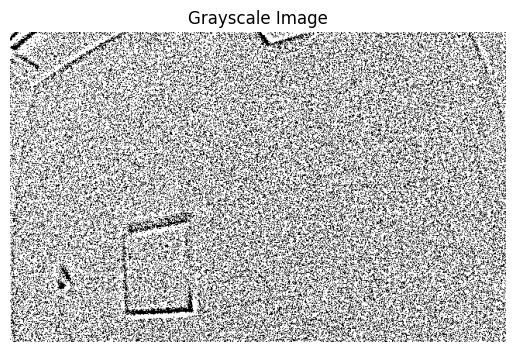

In [2]:
import cv2

# Perform adaptive thresholding
thresh_img = cv2.adaptiveThreshold(raw_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)
plt.imshow(thresh_img, cmap='gray')  # Show image in grayscale colormap
plt.title('Grayscale Image')
plt.axis('off')  # Hide axes
plt.show()